# <center> Nivelamento - Data Science </center>

## Crimes em São Francisco

Utilizando o dataset de [crimes em São Francisco](https://s3-sa-east-1.amazonaws.com/lcpi/54f2b05b-1fe0-44f9-ae75-5e84fb3da81f.csv), mostre 4 gráficos que indicam as localidades dos crimes (dispersão), reproduzindo a imagem a seguir. Faça com suplots, de tal forma que exista 1 gráfico para cada período do dia (manhã, tarde, noite e madrugada). Além disso, mostre para cada categoria do crime uma cor diferente. Realize os processamentos necessários para criação dos gráficos.

**Consultas à documentação do Python, Numpy, Pandas, Matplotlib, Seaborn e Sklearn liberadas.**

![](https://s3-sa-east-1.amazonaws.com/lcpi/cabfd987-74ac-4d8e-b461-06d1837a4ee7.png)

In [1]:
## Import de bibliotecas que serão usadas

In [2]:
pip install folium


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\jucoelho\anaconda3\envs\treinamento\lib\site-packages (from folium) (1.23.2)



In [3]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import geopandas as gp
import folium
import branca


In [5]:
df=pd.read_csv('54f2b05b-1fe0-44f9-ae75-5e84fb3da81f.csv', sep='|')

In [6]:
df.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,periodo,resolucao
0,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134,noite,outro
1,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",16008686306240,noite,outro


In [7]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

In [8]:
df['sep_time'] = pd.cut(df['Time'].dt.hour,
                            bins=[0, 6, 12, 18, 24],
                            labels=['madrugada', 'manhã', 'tarde', 'noite'],
                            include_lowest=True,
                            right=False)

In [9]:
df_madrugada=df[df.sep_time=='madrugada']

<AxesSubplot:xlabel='Y', ylabel='X'>

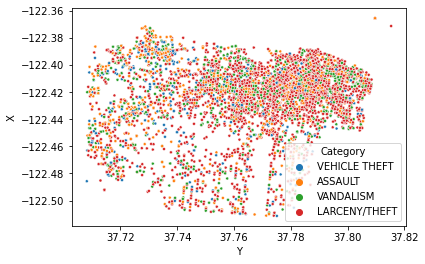

In [10]:
sns.scatterplot(x='Y', y='X' ,hue='Category', data=df_madrugada, marker='.')

In [11]:
def subplot_seaborn(data):
    # Configurar o layout de subplot
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    

    # Plot 1: MADRUGADA
    df_part=df[df.sep_time=='madrugada']
    sns.scatterplot(x='Y', y='X' ,hue='Category', data=df_part, marker='.',ax=axes[0,0])
    axes[0, 0].set_title('Gráfico do período da madrugada')

    # Plot 2: MANHA
    df_part=df[df.sep_time=='manhã']
    sns.scatterplot(x='Y', y='X' ,hue='Category', data=df_part, marker='.', ax=axes[0, 1])
    axes[0, 1].set_title('Gráfico do período da manhã')

    # Plot 3: TARDE
    df_part=df[df.sep_time=='tarde']
    sns.scatterplot(x='Y', y='X' ,hue='Category', data=df_part, marker='.', ax=axes[1, 0])
    axes[1, 0].set_title('Gráfico do período da tarde')

    # Plot 4: NOITE
    df_part=df[df.sep_time=='noite']
    sns.scatterplot(x='Y', y='X' ,hue='Category', data=df_part, marker='.', ax=axes[1, 1])
    axes[1, 1].set_title('Gráfico do período da noite')

    # Ajustar o layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Exibir os subplots
    plt.show()

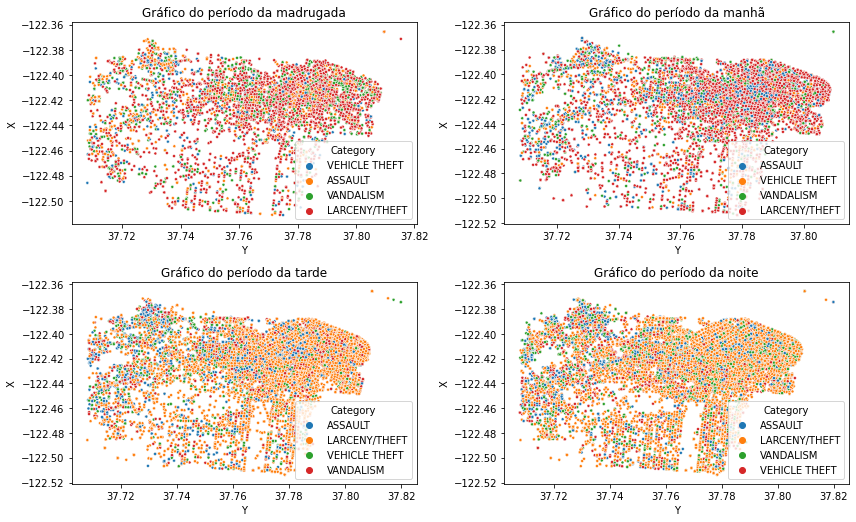

In [12]:
subplot_seaborn(data=df)

In [13]:
df['Categoria_Numérica'] = df['Category'].astype('category').cat.codes

In [16]:
#apesar de não ter sido pedido gosto de fazer a vizualização dos dados geograficos usando folium

In [17]:
def plot_folium(data):
    

    # MADRUGADA
    df_part=df[df.sep_time=='madrugada']
    lat_min, lat_max = df_part['Y'].min(), df_part['Y'].max()
    lon_min, lon_max = df_part['X'].min(), df_part['X'].max()
    latitudes= df_part['Y']
    longitudes=df_part['X']
    valores=df_part['Categoria_Numérica']
    center_lat = (lat_min + lat_max) / 2
    center_lon = (lon_min + lon_max) / 2
    mapa = folium.Map(location=[center_lat, center_lon], zoom_start=1)
    escala_cores = branca.colormap.linear.YlOrRd_09.scale(min(valores), max(valores))
    for lat, lon, valor in zip(latitudes, longitudes, valores):
        cor = escala_cores(valor)
        folium.CircleMarker(location=[lat, lon], radius=10, popup=f'Latitude: {lat}, Longitude: {lon}, Valor: {valor}', color=cor, fill=True).add_to(mapa)
    mapa.save('mapa_madrugada.html')

    #MANHÃ
    df_part=df[df.sep_time=='manhã']
    lat_min, lat_max = df_part['Y'].min(), df_part['Y'].max()
    lon_min, lon_max = df_part['X'].min(), df_part['X'].max()
    latitudes= df_part['Y']
    longitudes=df_part['X']
    valores=df_part['Categoria_Numérica']
    center_lat = (lat_min + lat_max) / 2
    center_lon = (lon_min + lon_max) / 2
    mapa = folium.Map(location=[center_lat, center_lon], zoom_start=1)
    escala_cores = branca.colormap.linear.YlOrRd_09.scale(min(valores), max(valores))
    for lat, lon, valor in zip(latitudes, longitudes, valores):
        cor = escala_cores(valor)
        folium.CircleMarker(location=[lat, lon], radius=10, popup=f'Latitude: {lat}, Longitude: {lon}, Valor: {valor}', color=cor, fill=True).add_to(mapa)
    mapa.save('mapa_manhã.html')

    # Plot 3: Histograma
    df_part=df[df.sep_time=='tarde']
    lat_min, lat_max = df_part['Y'].min(), df_part['Y'].max()
    lon_min, lon_max = df_part['X'].min(), df_part['X'].max()
    latitudes= df_part['Y']
    longitudes=df_part['X']
    valores=df_part['Categoria_Numérica']
    center_lat = (lat_min + lat_max) / 2
    center_lon = (lon_min + lon_max) / 2
    mapa = folium.Map(location=[center_lat, center_lon], zoom_start=1)
    escala_cores = branca.colormap.linear.YlOrRd_09.scale(min(valores), max(valores))
    for lat, lon, valor in zip(latitudes, longitudes, valores):
        cor = escala_cores(valor)
        folium.CircleMarker(location=[lat, lon], radius=10, popup=f'Latitude: {lat}, Longitude: {lon}, Valor: {valor}', color=cor, fill=True).add_to(mapa)
    mapa.save('mapa_tarde.html')
    
    # NOITE
    df_part=df[df.sep_time=='noite']
    lat_min, lat_max = df_part['Y'].min(), df_part['Y'].max()
    lon_min, lon_max = df_part['X'].min(), df_part['X'].max()
    latitudes= df_part['Y']
    longitudes=df_part['X']
    valores=df_part['Categoria_Numérica']
    center_lat = (lat_min + lat_max) / 2
    center_lon = (lon_min + lon_max) / 2
    mapa = folium.Map(location=[center_lat, center_lon], zoom_start=1)
    escala_cores = branca.colormap.linear.YlOrRd_09.scale(min(valores), max(valores))
    for lat, lon, valor in zip(latitudes, longitudes, valores):
        cor = escala_cores(valor)
        folium.CircleMarker(location=[lat, lon], radius=10, popup=f'Latitude: {lat}, Longitude: {lon}, Valor: {valor}', color=cor, fill=True).add_to(mapa)
    mapa.save('mapa_noite.html')
    # Exibir os subplots
    

In [18]:
plot_folium(data=df)

## Regressão Linear  - 35 pts

Ajuste uma regressão linear, sem regularização e sem pré-processamento, usando o dataset disponível no [link](https://s3-sa-east-1.amazonaws.com/lcpi/3fbeab8b-1b87-4f2b-9c9d-c6d2b5f02564.csv), tomando as colunas EXPL_X como variáveis explicativas e a coluna RESP como variável resposta. Em seguida, assinale qual das alternativas a seguir denota as 3 variáveis que mais impactam o resultado do modelo.

**Consultas à documentação do Python, Numpy, Pandas, Matplotlib, Seaborn e Sklearn liberadas.**

- a) EXPL_10, EXPL_9, EXPL_11
- b) EXPL_15, EXPL_23, EXPL_7
- c) EXPL_10, EXPL_7, EXPL_9
- d) EXPL_12, EXPL_14, EXPL_13
- e) EXPL_9, EXPL_11, EXPL_4

In [23]:
import sklearn
from sklearn.linear_model import LinearRegression

In [19]:
df=pd.read_csv('3fbeab8b-1b87-4f2b-9c9d-c6d2b5f02564.csv', sep=',')

In [20]:
df.columns

Index(['EXPL_0', 'EXPL_1', 'EXPL_2', 'EXPL_3', 'EXPL_4', 'EXPL_5', 'EXPL_6',
       'EXPL_7', 'EXPL_8', 'EXPL_9', 'EXPL_10', 'EXPL_11', 'EXPL_12',
       'EXPL_13', 'EXPL_14', 'EXPL_15', 'EXPL_16', 'EXPL_17', 'EXPL_18',
       'EXPL_19', 'EXPL_20', 'EXPL_21', 'EXPL_22', 'EXPL_23', 'EXPL_24',
       'RESP'],
      dtype='object')

In [21]:
X=df.iloc[:, :-1]
Y=df.iloc[:, -1]

In [24]:
reg = LinearRegression()
reg.fit(X, Y)

LinearRegression()

In [26]:
coef = reg.coef_


In [28]:
print("Coeficientes:", coef)

print("R²:", reg.score(X, Y))

Coeficientes: [-9.64040614e-15  5.10930428e-01  6.18324045e+00  2.24263056e-13
  3.94212364e+01 -8.93487711e-15 -8.79936662e-15 -7.71125378e+01
  1.08760228e-17  6.96112067e+01  9.26287424e+01  5.32097907e+01
 -3.93560917e-15  9.36462975e-14 -3.28865910e-14 -2.42466257e+01
  3.77713327e+01 -7.54951657e-15  5.87863092e-14  4.22162305e-14
  1.51878510e-13 -8.88178420e-15  1.77635684e-15 -4.84733444e+01
 -3.37507799e-14]
R²: 1.0


In [39]:
lista_positiva_coef = [abs(x) for x in coef]

<AxesSubplot:>

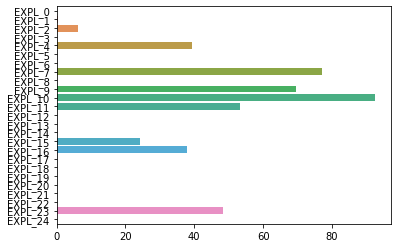

In [40]:
sns.barplot(x=lista_positiva_coef, y=X.columns)

## Vencedor

Baseado nas tabelas, assinale a alternativa com o resultado da query descrita.

**Consulta não liberada.**

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/7dbafb1c-863b-405f-b602-ca67d927cd17.png" width="50%"/></center>

```sql
SELECT id FROM runners
WHERE id NOT IN (SELECT winner_id FROM races)
```

- a) 1 4 5
- b) 2 3 2
- c) Null
- d) John Doe; Alice Jones; Bobby Louis.
- e) 1 2 3

## PLN - 10 pts

Um dos processos de extração de features de um texto consiste em converter um documento, como o apresentado abaixo:

```
"Eu acho que ela acha que ele não acha, mas ele achou."
```

em um vetor, como:

```
(acha, acho, achou, ela, ele, eu, mas, não, que)
[2 1 1 1 2 1 1 1 2]
```

Qual é o nome desse processo?

**Consulta não liberada.**

- a) POS
- b) BOW
- c) TF-IDF
- d) Tokenization
- e) Term Frequency

## Árvores - 10 pts

Algoritmos de árvores só são utilizados para previsão, seja de variável categórica (classificação) ou contínua (regressão).

Verdadeiro ou falso? Justifique.

**Consulta não liberada.**